# (Exploration of Bay Wheels's Trip Data)
## by Osama Atallah

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for year 2019. The data set consists of 12 files, one file for each month of the year.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
base_color = sb.color_palette()[4]

<br>Loading data set files and concatenate them into one dataframe (trips) 

In [5]:
import os

directory = './data/'

dataframes_list = [pd.read_csv(directory+filename, dtype = {'start_station_id': str, 'end_station_id': str, 'start_station_longitude': str, 'start_station_latitude': str, 'end_station_longitude': str, 'end_station_latitude': str} ) for filename in os.listdir(directory)]

/home/osama/miniconda3/envs/udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/osama/miniconda3/envs/udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/osama/miniconda3/envs/udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [6]:
trips = pd.concat(dataframes_list)
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,62337,2019-10-31 16:25:01.5970,2019-11-01 09:43:59.0290,148,Horton St at 40th St,37.8297046,-122.2876102,385,Woolsey St at Sacramento St,37.8505777,-122.2781754,12222,Customer,No,NaN
1,72610,2019-10-31 13:04:11.1950,2019-11-01 09:14:21.8050,376,Illinois St at 20th St,37.7604575554,-122.3875397444,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,282,Customer,No,NaN
2,56636,2019-10-31 17:17:37.6480,2019-11-01 09:01:33.7720,453,Brannan St at 4th St,37.7779336701,-122.3969730735,453,Brannan St at 4th St,37.7779336701,-122.3969730735,10940,Customer,No,NaN
3,42250,2019-10-31 20:11:11.1270,2019-11-01 07:55:21.7440,182,19th Street BART Station,37.8093686121,-122.2679507732,163,Lake Merritt BART Station,37.7973195,-122.2653199,12623,Subscriber,No,NaN
4,40076,2019-10-31 18:48:32.1410,2019-11-01 05:56:28.4670,237,Fruitvale BART Station,37.7752321,-122.2244982,237,Fruitvale BART Station,37.7752321,-122.2244982,2601,Customer,No,NaN


In [7]:
trips.to_csv('original_trips.csv')

In [129]:
trips = pd.read_csv('original_trips.csv', dtype = {'start_station_id': str, 'end_station_id': str, 'start_station_longitude': str, 'start_station_latitude': str, 'end_station_longitude': str, 'end_station_latitude': str})

/home/osama/miniconda3/envs/udacity/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
trips.shape

(2506983, 16)

### Structure of the dataset

The data set includes information of 2506983 rides and 15 columns. Each ride (row) includes: 
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

### The main feature of interest

I will be invistigating the *station hiring activity* (How many bikes it hires) and how it is related to other features.
### Other features in the dataset that will support my investigation

- Trip Duration (seconds)
- Start Time and Date
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station Name
- End Station Latitude
- End Station Longitude


In [131]:
trips.describe()

,Unnamed: 0,duration_sec,bike_id
count,2.506983e+06,2.506983e+06,2.506983e+06
mean,1.069645e+05,8.076483e+02,2.789833e+04
std,6.447902e+04,1.974714e+03,1.146067e+05
min,0.000000e+00,6.000000e+01,4.000000e+00
25%,5.222800e+04,3.590000e+02,1.952000e+03
50%,1.044570e+05,5.710000e+02,4.420000e+03
75%,1.572845e+05,8.870000e+02,9.682000e+03
max,2.581010e+05,9.121100e+05,9.999410e+05


In [132]:
trips.isna().sum()

Unnamed: 0                       0
duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [133]:
# drop unrelative columns
trips.drop(columns = ['bike_id', 'bike_share_for_all_trip', 'rental_access_method'], inplace=True)

In [134]:
# drop na
trips.dropna(axis=0, inplace=True)

In [135]:
# convert start and end time into datetime type
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

# fixing types
trips['start_station_id'] = trips['start_station_id'].astype(int)
trips['end_station_id'] = trips['end_station_id'].astype(int)

trips['start_station_latitude'] = trips['start_station_latitude'].astype(float)
trips['end_station_latitude'] = trips['end_station_latitude'].astype(float)

trips['start_station_longitude'] = trips['start_station_longitude'].astype(float)
trips['end_station_longitude'] = trips['end_station_longitude'].astype(float)

trips['duration_sec'] = trips['duration_sec'].astype(int)

In [136]:
# droping duplicates
trips.drop_duplicates(inplace=True)

In [137]:
trips.shape

(2407259, 13)

In [138]:
# check if there are any zero or negative trip duration
trips[trips['duration_sec'] <= 0]

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type


<br>

In [139]:
# check if there are stations with multiple geocordinates

(trips.groupby(['end_station_name'])['end_station_longitude'].nunique() > 1).sum()

13

In [140]:
(trips.groupby(['end_station_name'])['end_station_latitude'].nunique() > 1).sum()

12

*Some stations has multiple longitudes and latitude*. I will fixed this in the next steps

In [141]:
# creating "stations" data frame
start_stations = trips[['start_station_name','start_station_latitude', 'start_station_longitude']].drop_duplicates()
end_stations = trips[['end_station_name','end_station_latitude', 'end_station_longitude']].drop_duplicates()

start_stations.rename(columns={'start_station_name': 'station_name', 'start_station_latitude': 'station_latitude', 'start_station_longitude': 'station_logitude' }, inplace=True)
end_stations.rename(columns={'end_station_name': 'station_name', 'end_station_latitude': 'station_latitude', 'end_station_longitude': 'station_logitude' }, inplace=True)

stations = pd.concat([start_stations, end_stations]).drop_duplicates()
stations.shape[0]

461

In [142]:
start_stations.shape[0], end_stations.shape[0]

(460, 461)

**Start and end stations consist of the same set of stations**<br><br>

checking the correct number of stations

In [143]:
stations['station_name'].nunique()

445

*We still have 9 stations with multiple latitudes and longitude*<br><br>

In [144]:
#stations with multiple latitudes or longitudes
stations_multiloc = stations.groupby('station_name')['station_logitude'].nunique() > 1
stations_multiloc = stations_multiloc[stations_multiloc == True]

stations_multiloc2 = stations.groupby('station_name')['station_latitude'].nunique() > 1
stations_multiloc2 = stations_multiloc[stations_multiloc == True]

stations_multiloc.append(stations_multiloc2)
stations_multiloc

station_name
19th Street BART Station         True
22nd St Caltrain Station         True
2nd St at Folsom St              True
5th St at Taylor St              True
Asbury St at The Alameda         True
Fell St at Stanyan St            True
Foothill Blvd at 42nd Ave        True
George St at 1st St              True
Howard St at 2nd St              True
Hubbell St at 16th St            True
Indiana St at Cesar Chavez St    True
MTL-ECO5-01                      True
W Julian St at N Morrison St     True
Name: station_logitude, dtype: bool

 I'll drop them from both *trips* and *stations* dataframes.

In [145]:
# drop stations with multiple geocoordinates
trips = trips[~trips['start_station_name'].isin(stations_multiloc.index)]
trips = trips[~trips['end_station_name'].isin(stations_multiloc.index)]

In [146]:
# drop stations with multiple geocoordinates
stations = stations[~stations['station_name'].isin(stations_multiloc.index)]

In [147]:
trips[trips['start_station_name'].isin(stations_multiloc.index)]['start_station_name'].count()

0

In [148]:
trips.to_csv('wrangled_trips.csv')

In [149]:
trips = pd.read_csv('wrangled_trips.csv', dtype = {'start_station_id': str, 'end_station_id': str, 'start_station_longitude': str, 'start_station_latitude': str, 'end_station_longitude': str, 'end_station_latitude': str})

In [150]:
# convert start and end time into datetime type
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

# fixing types
trips['start_station_id'] = trips['start_station_id'].astype(int)
trips['end_station_id'] = trips['end_station_id'].astype(int)

trips['start_station_latitude'] = trips['start_station_latitude'].astype(float)
trips['end_station_latitude'] = trips['end_station_latitude'].astype(float)

trips['start_station_longitude'] = trips['start_station_longitude'].astype(float)
trips['end_station_longitude'] = trips['end_station_longitude'].astype(float)

trips['duration_sec'] = trips['duration_sec'].astype(int)

In [151]:
stations = trips[['start_station_name','start_station_latitude', 'start_station_longitude']].drop_duplicates()
stations.rename(columns={'start_station_name': 'station_name', 'start_station_latitude': 'station_latitude', 'start_station_longitude': 'station_logitude' }, inplace=True)

<br><br>
## Univariate Exploration

### Distribution of *Station Hiring Activity*

#### What are the properties of the distribution of hired bikes per station?

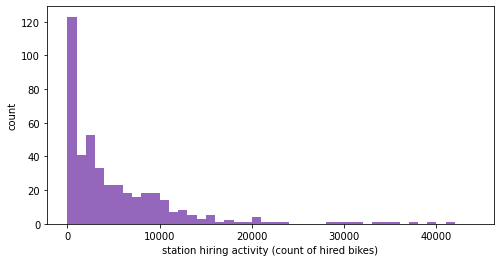

In [153]:
# plot the distribution of station hiring activity
no_trips_stations = trips['start_station_name'].value_counts().values
bins = np.arange(0, 45000, 1000)
fig, ax = plt.subplots(1, figsize=[8,4])
plt.hist(no_trips_stations, bins=bins, color=base_color);
plt.xlabel('station hiring activity (count of hired bikes)')
plt.ylabel('count');

The distribution of station activity covers large scale of values. Lets see it again with log transformation.

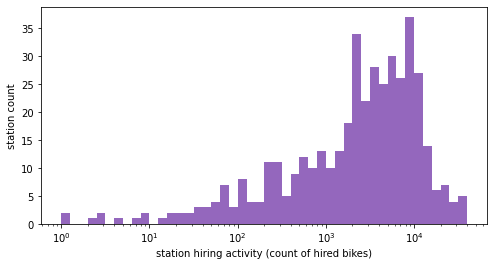

In [154]:
# plot the distribution of log(station activity)
no_trips_stations = trips['start_station_name'].value_counts().values

bins = 10 ** np.arange(0, np.log10(45000), 0.1)
fig, ax = plt.subplots(1, figsize=[8,4])
plt.hist(no_trips_stations, bins=bins, color=base_color);
plt.xscale('log')
plt.xlabel('station hiring activity (count of hired bikes)')
plt.ylabel('station count');

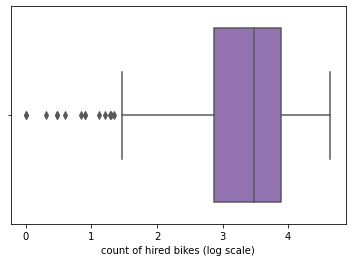

In [155]:
sb.boxplot(np.log10(no_trips_stations), color=base_color);
plt.xlabel('count of hired bikes (log scale)');

#### Findings
- The distribution of station activity covers large scale of values. Plotted on a logarithmic scale, the distribution takes on a multimodal shape with several peaks between ~ 2000 and 10000.

<br>Stations that have hired bikes count less than 200 are outliers. I will drop them

In [156]:
outlier_trip_count_stations = trips['start_station_name'].value_counts()
outlier_trip_count_stations = outlier_trip_count_stations[outlier_trip_count_stations < 200].index

In [157]:
trips = trips[~trips['start_station_name'].isin(outlier_trip_count_stations)]
trips = trips[~trips['end_station_name'].isin(outlier_trip_count_stations)]

In [158]:
trips.shape[0]

2266257

In [159]:
stations = stations[~stations['station_name'].isin(stations_multiloc.index)]
stations = stations[~stations['station_name'].isin(outlier_trip_count_stations)]

### Distribution of station latitude and longitude

#### What are the properties of the distribution of station longitudes and latitudes?

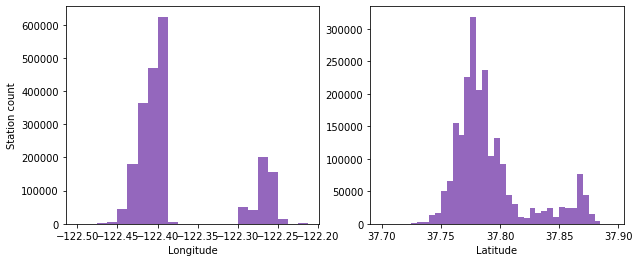

In [160]:
# plot the distribution os the geocoordinate of the stations
fig, axs = plt.subplots(1,2, figsize=[10,4])
long_bins = np.arange(-122.5, -122.2, 0.0125)
axs[0].hist(trips['start_station_longitude'], bins=long_bins, color=base_color);
axs[0].set_xlabel('Longitude');
axs[0].set_ylabel('Station count');

lat_bins = np.arange(37.7, 37.9, 0.005)
axs[1].hist(trips['start_station_latitude'], bins=lat_bins, color=base_color);
axs[1].set_xlabel('Latitude');

#### Findings:
- The longitude distribution shows that stations are two geo-seperated groups, East bay area and West bay area. 
- West bay has larger number of stations than the East bay.

<br><br>

In [161]:
# dropping rows with wronge geocoordinates
trips = trips[(trips['start_station_longitude'] < -122.2) & (trips['start_station_longitude'] > -122.5)]
trips = trips[(trips['start_station_latitude'] < 37.9) & (trips['start_station_latitude'] > 37.7)]

trips = trips[(trips['end_station_longitude'] < -122.2) & (trips['end_station_longitude'] > -122.5)]
trips = trips[(trips['end_station_latitude'] < 37.9) & (trips['end_station_latitude'] > 37.7)]

In [162]:
# dropping rows with wronge geocoordinates
stations = stations[(stations['station_logitude'] < -122.2) & (stations['station_logitude'] > -122.5)]
stations = stations[(stations['station_latitude'] < 37.9) & (stations['station_latitude'] > 37.7)]

stations = stations[(stations['station_logitude'] < -122.2) & (stations['station_logitude'] > -122.5)]
stations = stations[(stations['station_latitude'] < 37.9) & (stations['station_latitude'] > 37.7)]

### Distribution of ride duration

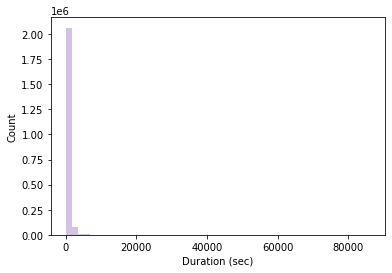

In [163]:
# plot the distribution of ride duration
sb.distplot(trips['duration_sec'], kde=False, color=base_color);
plt.xlabel('Duration (sec)')
plt.ylabel('Count');

The distribution of the ride duration is skewed with very log right tail. Lets see it again with log transformation.

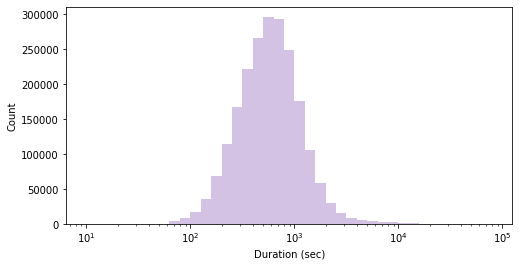

In [164]:
# plot the distribution of log(ride duration)
plt.figure(figsize=[8,4])
ax = plt.gca()
bins = 10 ** np.arange(1, 5, 0.1)
sb.distplot(trips['duration_sec'], bins = bins, kde=False, ax=ax, color=base_color);
plt.xlabel('Duration (sec)')
plt.ylabel('Count');
plt.xscale('log');

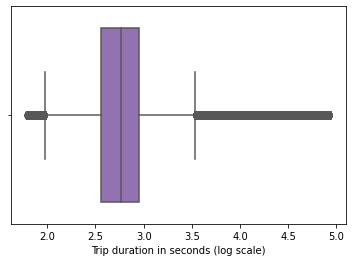

In [165]:
sb.boxplot(np.log10(trips['duration_sec']), color=base_color);
plt.xlabel('Trip duration in seconds (log scale)');

#### Findings:
- After log transformation, the distribution of ride duration looks like normal distribution with small right skwness.
- Rides have duration between 100 sec and 2000 sec, and the mean is approximately 700 sec (12 min).

<br><br>Rides with duration out of this range are outliers, and I'll remove them.

In [166]:
trips = trips[(trips['duration_sec'] >= 100) & (trips['duration_sec'] <= 2000)]

In [167]:
# create helper columns: start_hours, day, week, month and day of week

trips['start_hour'] = trips['start_time'].dt.hour
trips['day'] = trips['start_time'].dt.day
trips['month'] = trips['start_time'].dt.month
trips['week'] = trips['start_time'].dt.week
trips['dayofweek'] = trips['start_time'].dt.dayofweek

In [ ]:
trips.to_csv('wrangled_enhanced_trips.csv')

In [4]:
trips = pd.read_csv('wrangled_enhanced_trips.csv', dtype={'start_station_id': str, 'end_station_id': str, 'start_station_longitude': str, 'start_station_latitude': str, 'end_station_longitude': str, 'end_station_latitude': str})

In [5]:
# convert start and end time into datetime type
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

# fixing types
trips['start_station_id'] = trips['start_station_id'].astype(int)
trips['end_station_id'] = trips['end_station_id'].astype(int)

trips['start_station_latitude'] = trips['start_station_latitude'].astype(float)
trips['end_station_latitude'] = trips['end_station_latitude'].astype(float)

trips['start_station_longitude'] = trips['start_station_longitude'].astype(float)
trips['end_station_longitude'] = trips['end_station_longitude'].astype(float)

trips['duration_sec'] = trips['duration_sec'].astype(int)

trips['start_hour'] = trips['start_time'].dt.hour
trips['day'] = trips['start_time'].dt.day
trips['month'] = trips['start_time'].dt.month
trips['week'] = trips['start_time'].dt.week
trips['dayofweek'] = trips['start_time'].dt.dayofweek

In [6]:
stations = trips[['start_station_name','start_station_latitude', 'start_station_longitude']].drop_duplicates()
stations.rename(columns={'start_station_name': 'station_name', 'start_station_latitude': 'station_latitude', 'start_station_longitude': 'station_logitude' }, inplace=True)

###  Exploration of Time Series of Hiring activity

In [19]:
trips_per_month_day = trips.groupby(['month', 'day'])['day'].count()

### Time series of daily hired bikes

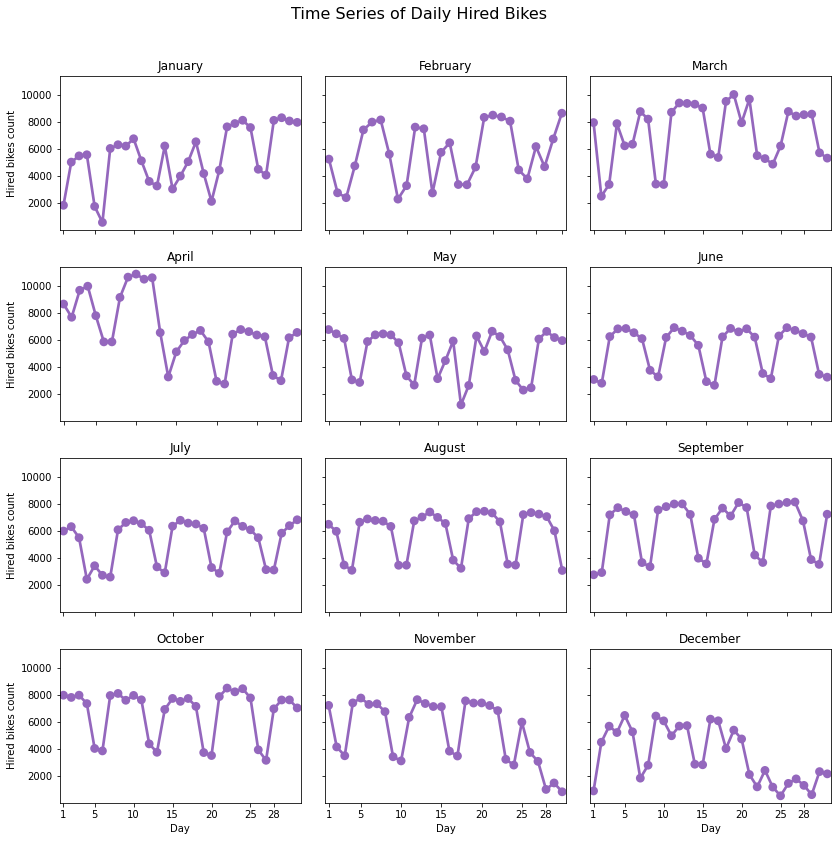

In [52]:
fig, axs = plt.subplots(4, 3, figsize=[12, 12], sharey=True)
fig.suptitle('Time Series of Daily Hired Bikes', fontsize=16)

i = 1
month_dc = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
     7: 'July', 8: 'August', 9: 'September', 10: 'October', 11:'November', 12: 'December'}
for xs in axs:
    for ax in xs:
        df = trips_per_month_day.iloc[trips_per_month_day.index.get_level_values('month') == i]
        df.reset_index(level=0, drop=True)
        sb.pointplot(x=df.index, y=df.values, color=base_color, ax=ax);
        ax.set_title(month_dc[i])
        ax.set_xlabel('Day')
        ax.set_xticks([0, 4, 9, 14, 19, 24, 27])
        ax.set_xticklabels(['1', '5', '10', '15', '20', '25', '28'])
        ax.set_ylabel('Hired bikes count')
        ax.set_yticks([2000, 4000, 6000, 8000, 10000])
        ax.set_yticklabels(['2000', '4000', '6000', '8000', '10000'])
        ax.set_yticklabels([],minor = True)
        i+=1
        
for ax in axs.flat:
    ax.label_outer()
    
fig.tight_layout(pad=2)
fig.subplots_adjust(top=0.9)


#### Findings:
- There is a major decline in bike hiring after April 15th.
**15/04/2019 — Citi Bike Pulls New Electric Bikes Off Streets, Citing Safety Concerns. The pedal-assist bikes operated by Lyft-owned companies in New York City, San Francisco and Washington were removed based on concerns over the brakes.**
<a href=https://www.nytimes.com/2019/04/15/nyregion/citi-bike-electric.html >NY Times</a> 
<br>
- It seems that a lot of electric bikes fans in Bay area didn't hire bikes after that date.
- Weekdays look like hills and weekends in between. This pattern has some noise in the period before April 15th compared to the period after April 15th which seems consistent and approximately has no noise.

### Time series of weekly hired bikes

In [178]:
trips_weeks = trips.groupby('week')['week'].count()

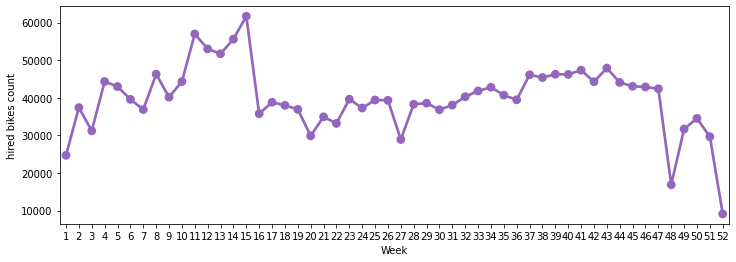

In [179]:
# plot the time series hired bikes count per week for year 2019
plt.figure(figsize=[12,4])
sb.pointplot(x=trips_weeks.index.values, y=trips_weeks.values, color=base_color);
plt.xlabel('Week')
plt.ylabel('hired bikes count');

#### Findings:
- Before April 15th there was a clear inceasing trend which stopped after this date.
- Flipped spikes are due holidays such as 4th of july, 7th of july, Labor day, Thanks giving, Christmas, etc.

### Distribution of hourly hiring activity

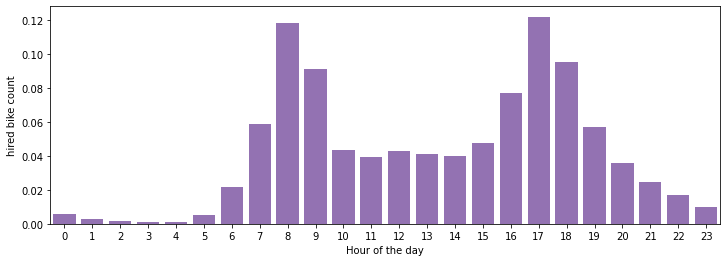

In [180]:
# plot the distribution of hired bike count per hour
trips_start_hours = trips.groupby('start_hour').size()
total_trips_start_hours = trips_start_hours.sum()
start_hours_proportion = trips_start_hours / total_trips_start_hours

plt.figure(figsize=[12,4])
ax = plt.gca()
sb.barplot(x=start_hours_proportion.index, y=start_hours_proportion.values, color=base_color, ax=ax);
ax.set_xlabel('Hour of the day')
ax.set_ylabel('hired bike count');

### Findings: 
- The distribution is bimodal as expected, with rush hours located at morning and evening: 7am, 8am, 9am, 4pm, 5pm, and 6pm

## Bivariate Exploration


### Disribution of stations locations

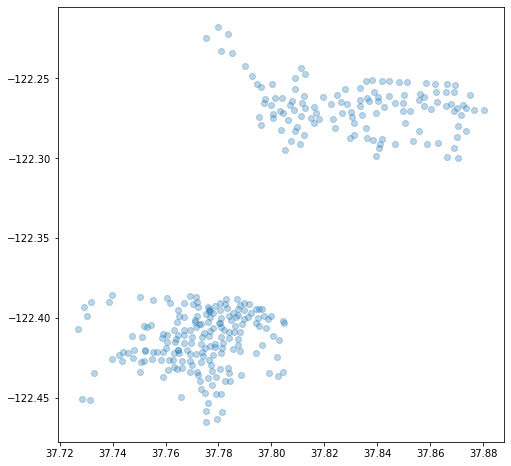

In [181]:
fig, ax = plt.subplots(1, figsize=[8, 8])
ax.scatter(data=stations, x='station_latitude', y='station_logitude', alpha=0.3);

#### Findings:
- East Bay at the North East and West Bay at the South West seperated by water

### Hiring activity vs. Day of week

In [17]:
trips_dayofweek = trips.groupby('dayofweek')['dayofweek'].count()

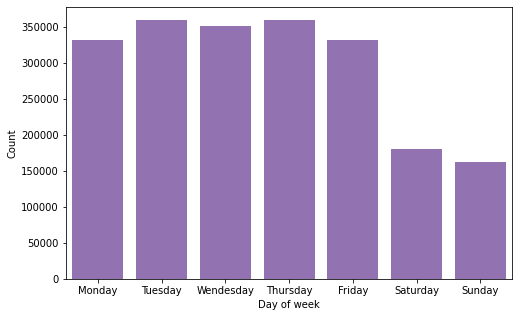

In [19]:
# plot the distribution of hired bikes count per day of the week
plt.figure(figsize=[8,5])
ax = plt.gca()
sb.barplot(x=trips_dayofweek.index, y=trips_dayofweek.values, color=base_color, ax=ax);
ax.set_xlabel('Day of week')
ax.set_ylabel('Count')
ticks, _ = plt.xticks()
labels = ['Monday', 'Tuesday', 'Wendesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks, labels);

#### Findings:
- Working days have much more hiring activity than weekend. Interestingly, Tuesdays, Wendesdays and Thursdays have more hired bikes count than Mandays and Fridays. 
- Wendesdays have less hiring than Tuesdays and Thursdays

### Station category by other features

I'll create station categories based on their hiring activity

In [182]:
trip_counts = trips['start_station_name'].value_counts()
trip_counts_df = pd.DataFrame({'trip_counts' : trip_counts.values}, index=trip_counts.index)

In [183]:
stations = stations.join(trip_counts_df, on='station_name')

In [184]:
stations.head()

,station_name,station_latitude,station_logitude,trip_counts
0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,19185
1,Hyde St at Post St,37.787349,-122.416651,7233
2,17th St at Valencia St,37.763316,-122.421904,11958
3,20th St at Dolores St,37.758238,-122.426094,3100
4,Mission Playground,37.759210,-122.421339,10083


In [185]:
trip_counts_df.describe()

,trip_counts
count,314.000000
mean,6603.273885
std,6936.776975
min,182.000000
25%,2030.750000
50%,4543.000000
75%,8857.750000
max,43054.000000


#### Station Categories
I'll split stations into four categories based on their hiring activity (4 quartiles):
- Category A: least active stations that have less than 2031 hired bike
- Category B: active stations that have more than 2031 and less than 4543 hired bike
- Category C: active stations that have more than 4543 and less than 8859 hired bike
- Category D: active stations that have more than 8859

In [186]:
# creating category column for stations hiring activity
stations['station category'] = np.nan
stations = stations.copy()
stations.loc[(stations['trip_counts'] > 8858), 'station category'] = 'D'
stations.loc[(stations['trip_counts'] <= 8858), 'station category'] = 'C'
stations.loc[(stations['trip_counts'] < 4543), 'station category'] = 'B'
stations.loc[(stations['trip_counts'] < 2031), 'station category'] = 'A'

In [187]:
so_busy_tion = stations.loc[stations['station category'] == 'D', 'station_name'].values
busy_tion = stations.loc[stations['station category'] == 'C', 'station_name'].values
active_tion = stations.loc[stations['station category'] == 'B', 'station_name'].values
inactive_tion = stations.loc[stations['station category'] == 'A', 'station_name'].values

trips['start_station_cat'] = np.nan
trips = trips.copy()

trips.loc[trips['start_station_name'].isin(so_busy_tion), 'start_station_cat'] = 'D'
trips.loc[trips['start_station_name'].isin(busy_tion), 'start_station_cat'] = 'C'
trips.loc[trips['start_station_name'].isin(active_tion), 'start_station_cat'] = 'B'
trips.loc[trips['start_station_name'].isin(inactive_tion), 'start_station_cat'] = 'A'

In [188]:
order_l = ['A', 'B', 'C', 'D']
cat_type = pd.api.types.CategoricalDtype(ordered=True, categories=order_l)

stations['station category'] = stations['station category'].astype(cat_type)
trips['start_station_cat'] = trips['start_station_cat'].astype(cat_type)

In [189]:
trips.to_csv('wrangled_enhanced_trips2.csv')

In [3]:
trips = pd.read_csv('wrangled_enhanced_trips2.csv', dtype={'start_station_id': str, 'end_station_id': str, 'start_station_longitude': str, 'start_station_latitude': str, 'end_station_longitude': str, 'end_station_latitude': str})

In [4]:
# convert start and end time into datetime type
trips['start_time'] = pd.to_datetime(trips['start_time'])
trips['end_time'] = pd.to_datetime(trips['end_time'])

# fixing types
trips['start_station_id'] = trips['start_station_id'].astype(int)
trips['end_station_id'] = trips['end_station_id'].astype(int)

trips['start_station_latitude'] = trips['start_station_latitude'].astype(float)
trips['end_station_latitude'] = trips['end_station_latitude'].astype(float)

trips['start_station_longitude'] = trips['start_station_longitude'].astype(float)
trips['end_station_longitude'] = trips['end_station_longitude'].astype(float)

trips['duration_sec'] = trips['duration_sec'].astype(int)

trips['start_hour'] = trips['start_time'].dt.hour
trips['day'] = trips['start_time'].dt.day
trips['month'] = trips['start_time'].dt.month
trips['week'] = trips['start_time'].dt.week
trips['dayofweek'] = trips['start_time'].dt.dayofweek

In [5]:
stations = trips[['start_station_name','start_station_latitude', 'start_station_longitude', 'start_station_cat']].drop_duplicates()
stations.rename(columns={'start_station_name': 'station_name', 'start_station_latitude': 'station_latitude', 'start_station_longitude': 'station_logitude', 'start_station_cat': 'station category' }, inplace=True)

In [6]:
base_color = sb.color_palette()[4]

In [16]:
trips.shape[0] , stations.shape[0]

(2073428, 314)

<br>

### Station category by ride duration

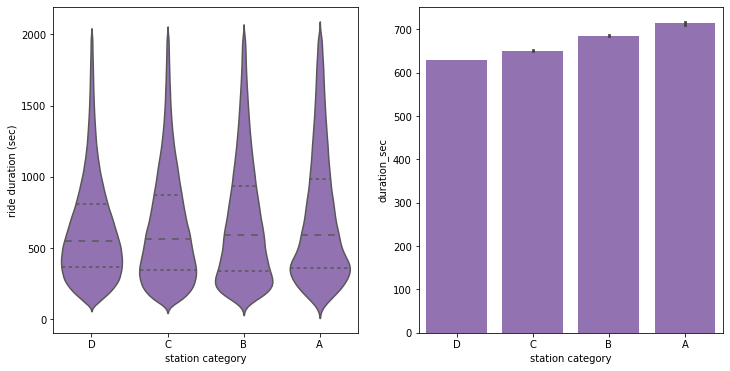

In [194]:
fig = plt.figure(figsize=[12,6])
ax = fig.add_subplot(1,2,1)
sb.violinplot(data=trips, x='start_station_cat', y='duration_sec', color=base_color, inner='quartile', ax=ax);
ax.set_xlabel('station category')
ax.set_ylabel('ride duration (sec)');

ax = fig.add_subplot(1,2,2)
sb.barplot(data=trips, x='start_station_cat', y='duration_sec', color=base_color, ax=ax);
ax.set_xlabel('station category');


#### Findings:
- The bar chart show that the mean of the ride durations is inversely proportional to station hiring activity. 
- The violin chart shows that the distribution of ride duration get less broader as station has more hiring activity.

<br>

## Multivariate Exploration


### Station category by day of week and hiring activity 

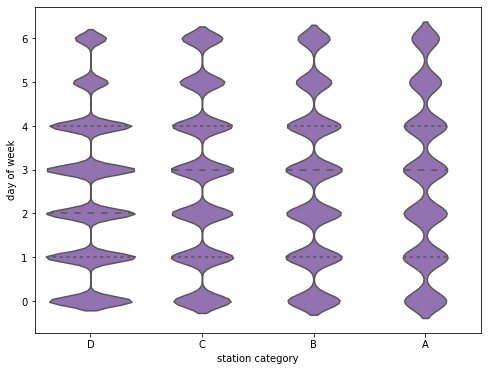

In [195]:
fig = plt.figure(figsize=[8,6])
ax = fig.add_subplot(1,1,1)
sb.violinplot(data=trips, x='start_station_cat', y='dayofweek', color=base_color, inner='quartile', ax=ax);
ax.set_xlabel('station category')
ax.set_ylabel('day of week');

#### Findings:
- The busier the stations are, the larger the difference btw hiring activities in weekdays and in weekends.
<br>

### Time series of daily hired bikes by station category

In [196]:
station_rides_day = trips.groupby(['month', 'day', 'start_station_cat']).size()
station_rides_day.reset_index(drop=True, level=[0, 1], inplace=True)

In [197]:
station_rides_day = pd.DataFrame(station_rides_day.reset_index(name='hired bikes count'))

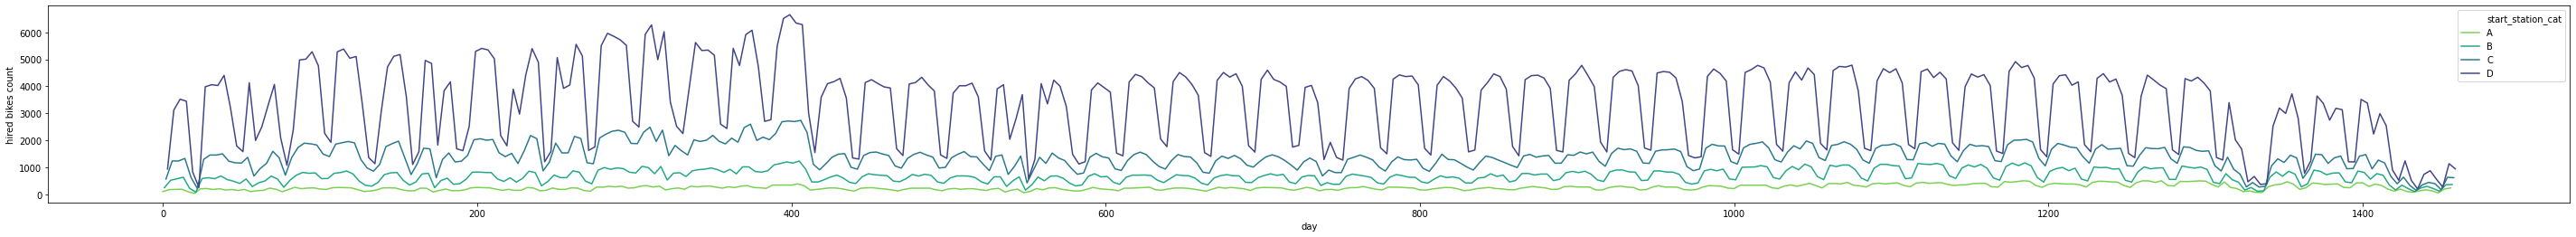

In [198]:
plt.figure(figsize=[50,4])
sb.lineplot(data = station_rides_day, x=station_rides_day.index, y='hired bikes count', hue='start_station_cat', palette='viridis_r');
plt.xlabel('day');

### Time series of weekly hired bikes by station category


In [199]:
trips_weeks = trips.groupby(['week', 'start_station_cat']).size()
trips_weeks = trips_weeks.reset_index(name='count')
trips_weeks = trips_weeks.sort_values('start_station_cat')

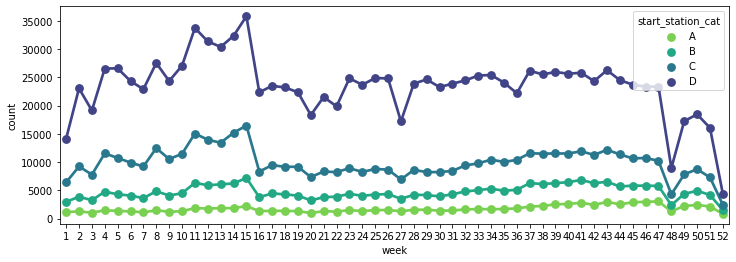

In [200]:
plt.figure(figsize=[12,4])
sb.pointplot(data=trips_weeks, x='week', y='count', hue='start_station_cat', palette='viridis_r');

#### Findings:
- For category D stations, filpped spikes due holidays have large magnitudes. Therefore the hiring activity of D category stations is most affected by holidays
<br>


### Station category by hourly hiring activity 

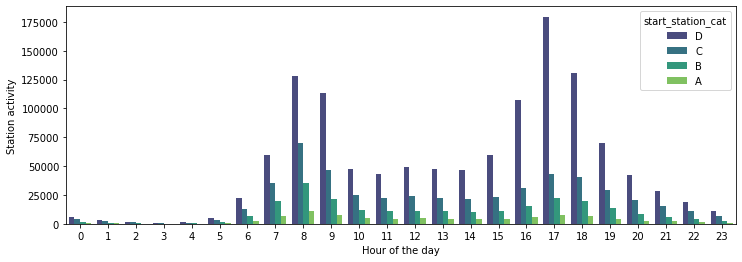

In [201]:
plt.figure(figsize=[12,4])
ax = plt.gca()
sb.countplot(data = trips, x='start_hour', hue='start_station_cat', palette='viridis', ax=ax);
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Station activity');

#### Findings:
- The bar chart shows that category D stations hires much more bikes in evening rush hours than morning rush hours while it is the opposite for category C stations.

### Station location by station category

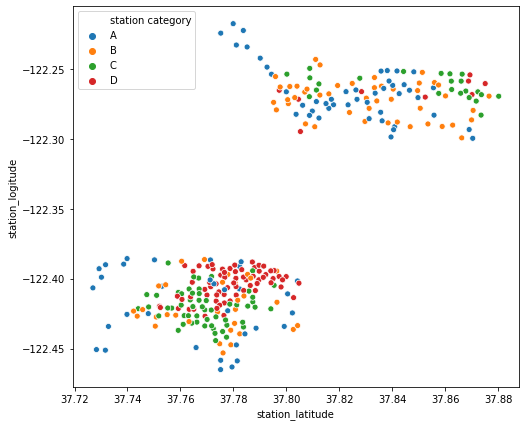

In [7]:
fig, ax = plt.subplots(1, figsize=[8, 7])
sb.scatterplot(data=stations, x='station_latitude', y='station_logitude', hue='station category', hue_order=['A', 'B', 'C', 'D'], y_jitter=0.7);

#### Findings:
- Most of the busiest stations (categories D and C)  are in West Bay area while East Bay has mostly less busier stations (categories A and B). 
- In the West Bay area, Category D stations are concentrated at North East (the busiest region of the Bay) by and near the see. As you move towards South West, category C stations dominate.  Category B are scaterred here and there withen these two regions while category A stations mostly reside outside the busy regions.


### Station category by ride duration mean and day of week

In [203]:
dayofweek_stationcat_duration = trips[['dayofweek', 'start_station_cat', 'duration_sec']]

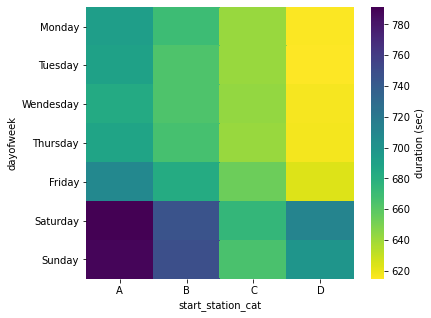

In [204]:
fig, ax = plt.subplots(1, figsize=[6, 5])
tble = dayofweek_stationcat_duration.groupby(['dayofweek', 'start_station_cat'])['duration_sec'].mean()
sb.heatmap(tble.reset_index().pivot(index='dayofweek', columns='start_station_cat', values='duration_sec'),
           cmap='viridis_r', cbar_kws={'label': 'duration (sec)'}, ax=ax);

ticks, _ = plt.yticks()
plt.yticks(ticks, labels=['Monday', 'Tuesday', 'Wendesday', 'Thursday','Friday', 'Saturday', 'Sunday']);
plt.yticks(rotation=0);

#### Findings:
- Interestingly, ride durations are higher in weekends by about 1 - 2 min than weekdays.
- Also ride durations have inversely proportional relation with station category.


### Station category by hour and ride duration mean

In [11]:
hourofday_stationcat_duration = trips[['start_hour', 'start_station_cat', 'duration_sec']]

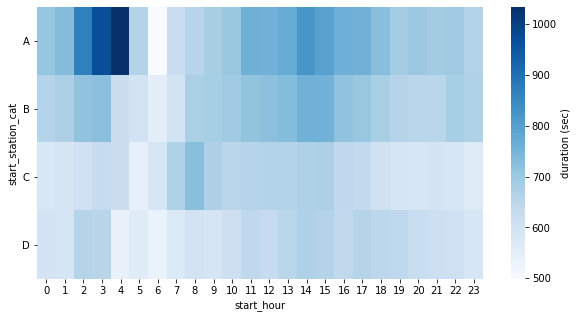

In [14]:
fig, ax = plt.subplots(1, figsize=[10, 5])
tble = hourofday_stationcat_duration.groupby(['start_hour', 'start_station_cat'])['duration_sec'].mean()
sb.heatmap(tble.reset_index().pivot(index='start_station_cat', columns='start_hour', values='duration_sec'),
           cmap='Blues', cbar_kws={'label': 'duration (sec)'}, ax=ax);

plt.yticks(rotation=0);

#### Findings:
- As we move from busier categories to less busier categories, ride durarion increases.
- For all station categories except category C, at early morning, ride duration mean is at its minimum and rise gradualy with time to reach its day peak at 2pm and 3pm, then starts to decline gradualy, then rise to another peak at late night.
- The disribution of ride duration mean for category C is right skewed with its peak at 8am.
- Category A has its night peak at 4am and it is much higher than its day peak.